In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
import theano
import numpy as np
from keras.layers import Input, Dense, convolutional,Reshape, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Model
from keras.optimizers import *

%matplotlib inline






Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [79]:
# this is our input placeholder
input_img = Input(shape=(1,28,28))

x = convolutional.Convolution2D(10, 5, 5, activation='relu', border_mode='same')(input_img)
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x)
x = convolutional.Convolution2D(10, 3, 3, activation='relu', border_mode='same')(x) 
x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) 
#x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
##x = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) 
##x = convolutional.Convolution2D(10, 2, 2, activation='relu', border_mode='same')(x)
#encoded = convolutional.MaxPooling2D((2, 2), border_mode='same')(x) 

x = Flatten()(x)
encoded = Dense(40, activation='relu')(x)
x= Dense (490, activation = 'relu')(encoded)
x = Reshape((10,7,7))(x) 
x = convolutional.UpSampling2D((2, 2))(x) 
##x = convolutional.Convolution2D(10, 2, 2, activation='relu', border_mode='same')(x)
##x = convolutional.UpSampling2D((2, 2))(x) 
x = convolutional.Convolution2D(10, 3, 3, activation='relu', border_mode='same')(x) 
#x = convolutional.UpSampling2D((2, 2))(x) 
#x = convolutional.Convolution2D(20, 5, 5, activation='relu', border_mode='same')(x) 
x = convolutional.UpSampling2D((2, 2))(x)
x = convolutional.Convolution2D(10, 5, 5, activation='relu',border_mode='same')(x) 
decoded = convolutional.Convolution2D(1, 5, 5, activation='sigmoid', border_mode='same')(x) 
#x = Flatten()(x) ##3072
#x = Dense(3072, activation='linear')(x)
#decoded = Reshape((3,32,32))(x) ##3, 32, 32
#decoded = convolutional.Convolution2D(3, 5, 5, activation='sigmoid', border_mode='same')(x)
autoencoder = Model(input_img, decoded)
#sgd=SGD(lr=0.002, momentum=0.1, decay=0.0, nesterov=False)
autoencoder.compile(optimizer='Adam', loss='mean_squared_error',metrics=['accuracy'])

In [80]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_14 (InputLayer)            (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_49 (Convolution2D) (None, 10, 28, 28)    260         input_14[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_26 (MaxPooling2D)   (None, 10, 14, 14)    0           convolution2d_49[0][0]           
____________________________________________________________________________________________________
convolution2d_50 (Convolution2D) (None, 10, 14, 14)    910         maxpooling2d_26[0][0]            
___________________________________________________________________________________________

In [8]:
x_train = np.genfromtxt('x_train.out')
y_train = np.genfromtxt('y_train.out')
vx_train = np.genfromtxt('vx_train.out')
vy_train = np.genfromtxt('vy_train.out')
x_test = np.genfromtxt('x_test.out')
y_test = np.genfromtxt('y_test.out')

In [81]:
print (x_train.shape)
print (y_train.shape)
print (vx_train.shape)
print (vy_train.shape)
print (x_test.shape)
print (y_test.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


In [11]:
from keras.utils.np_utils import *
label_train=to_categorical(y_train)
label_valid=to_categorical(vy_train)
label_test= to_categorical(y_test)

/home/mrafi123/anaconda3/lib/python3.5/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/home/mrafi123/anaconda3/lib/python3.5/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


In [82]:
train_x_temp = x_train.reshape(-1,1, 28, 28)
val_x_temp = vx_train.reshape(-1,1, 28, 28)
test_x_temp=x_test.reshape(-1,1, 28, 28)
print(train_x_temp.shape)
print(val_x_temp.shape)
print(test_x_temp.shape)

(50000, 1, 28, 28)
(10000, 1, 28, 28)
(10000, 1, 28, 28)


In [84]:
# this model maps an input to its encoded representation
#encoding_dim=40
#encoded = convolutional.Convolution2D(3, 5, 5, activation='relu', border_mode='same')(encoded)
#encoded = Flatten()(encoded)
#encoded = Dense(encoding_dim, activation='sigmoid')(encoded)
#encoded = convolutional.Convolution2D(3, 5, 5, activation='relu', border_mode='same')(encoded)
#encoded = Reshape((3,32,32))(encoded) ##3, 32, 32

encoder = Model(input_img, encoded)

In [85]:
print (encoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_14 (InputLayer)            (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_49 (Convolution2D) (None, 10, 28, 28)    260         input_14[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_26 (MaxPooling2D)   (None, 10, 14, 14)    0           convolution2d_49[0][0]           
____________________________________________________________________________________________________
convolution2d_50 (Convolution2D) (None, 10, 14, 14)    910         maxpooling2d_26[0][0]            
___________________________________________________________________________________________

In [86]:
nb_epoch=5
batch_size=64
random_state =5578

In [87]:
kfold_weights_path = os.path.join('weights_kfold_' +  'MNIST-Conv-AutoEncoder-Ver7.6' +
                                  '_epoch_'+str(nb_epoch)+
                                  '_batch_'+str(batch_size)
                                  +'.h5')
print(kfold_weights_path)

weights_kfold_MNIST-Conv-AutoEncoder-Ver7.6_epoch_10_batch_64.h5


In [88]:
os.path.isfile(kfold_weights_path)

True

In [18]:
# Some transfer learning
if os.path.isfile(kfold_weights_path):
    print ('Loading already stored weights...')
    autoencoder.load_weights(kfold_weights_path)
else:
    print ('Training for the first time...')
    

Training for the first time...


In [89]:
noise_factor = 0.2
s_train_noisy = train_x_temp + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x_temp.shape) 
s_val_noisy = val_x_temp + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=val_x_temp.shape) 

s_train_noisy = np.clip(s_train_noisy, 0., 1.)
s_val_noisy = np.clip(s_val_noisy, 0., 1.)

In [90]:
callbacks = [
                EarlyStopping(monitor='val_loss', patience=2, verbose=1),
                ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=1),
            ]
autoencoder.fit(s_train_noisy, train_x_temp,
            nb_epoch=nb_epoch,
            batch_size=batch_size,
            shuffle=True,
            validation_data=(s_val_noisy, val_x_temp),
            callbacks=callbacks
            )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 117s - loss: 0.0374 - acc: 0.2108 - val_loss: 0.0171 - val_acc: 0.2782
Epoch 2/10
50000/50000 [==============================] - 118s - loss: 0.0146 - acc: 0.3189 - val_loss: 0.0131 - val_acc: 0.3442
Epoch 3/10
50000/50000 [==============================] - 118s - loss: 0.0120 - acc: 0.3580 - val_loss: 0.0112 - val_acc: 0.3681
Epoch 4/10
50000/50000 [==============================] - 119s - loss: 0.0108 - acc: 0.3664 - val_loss: 0.0104 - val_acc: 0.3812
Epoch 5/10
50000/50000 [==============================] - 118s - loss: 0.0101 - acc: 0.3763 - val_loss: 0.0100 - val_acc: 0.3980
Epoch 6/10
50000/50000 [==============================] - 118s - loss: 0.0095 - acc: 0.3862 - val_loss: 0.0095 - val_acc: 0.4087
Epoch 7/10
50000/50000 [==============================] - 118s - loss: 0.0092 - acc: 0.3946 - val_loss: 0.0090 - val_acc: 0.4097
Epoch 8/10
50000/50000 [=======================

In [91]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_14 (InputLayer)            (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_49 (Convolution2D) (None, 10, 28, 28)    260         input_14[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_26 (MaxPooling2D)   (None, 10, 14, 14)    0           convolution2d_49[0][0]           
____________________________________________________________________________________________________
convolution2d_50 (Convolution2D) (None, 10, 14, 14)    910         maxpooling2d_26[0][0]            
___________________________________________________________________________________________

In [92]:
reconstructed_test_imgs = autoencoder.predict(test_x_temp)


In [93]:
reconstructed_test_imgs.shape

(10000, 1, 28, 28)

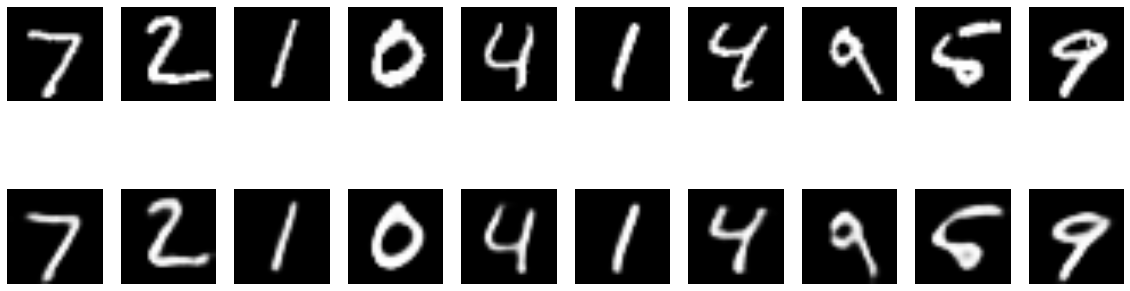

In [94]:
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_x_temp[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_test_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [95]:
print (encoder.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_14 (InputLayer)            (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_49 (Convolution2D) (None, 10, 28, 28)    260         input_14[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_26 (MaxPooling2D)   (None, 10, 14, 14)    0           convolution2d_49[0][0]           
____________________________________________________________________________________________________
convolution2d_50 (Convolution2D) (None, 10, 14, 14)    910         maxpooling2d_26[0][0]            
___________________________________________________________________________________________

In [96]:
encoded_train_imgs = encoder.predict(train_x_temp)
print (encoded_train_imgs.size)
print (encoded_train_imgs.shape)
print (encoded_train_imgs.nbytes)

2000000
(50000, 40)
16000000


In [97]:
encoded_test_imgs = encoder.predict(test_x_temp)
print (encoded_test_imgs.size)
print (encoded_test_imgs.shape)
print (encoded_test_imgs.nbytes)

400000
(10000, 40)
3200000


In [98]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(encoded_train_imgs, y_train)

In [99]:
y_pred = clf.predict(encoded_test_imgs)


In [100]:
y_pred

array([ 7.,  2.,  1., ...,  4.,  5.,  6.])

In [101]:
num=len(encoded_test_imgs)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  9716 wrong:  284 error rate:  2.84 %
got correctly  97.16 %


In [103]:
input_dim = Input(shape=(40,))
x = Dense(100, activation='relu')(input_dim)
classifier = Dense(10, activation='softmax')(x)
nn = Model(input=input_dim, output=classifier)

nn.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [104]:
from keras.utils.np_utils import *

label_train=to_categorical(y_train)
label_test= to_categorical(y_test)
print (label_train.shape)
print (label_test.shape)

(50000, 10)
(10000, 10)


/home/mrafi123/anaconda3/lib/python3.5/site-packages/keras/utils/np_utils.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = np.zeros((len(y), nb_classes))
/home/mrafi123/anaconda3/lib/python3.5/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


In [105]:
nn.fit(encoded_train_imgs, label_train,
            nb_epoch=50,
            batch_size=batch_size,
            shuffle=True)

Epoch 1/50
50000/50000 [==============================] - 2s - loss: 1.7526 - acc: 0.4693     
Epoch 2/50
50000/50000 [==============================] - 1s - loss: 0.7390 - acc: 0.8249     
Epoch 3/50
50000/50000 [==============================] - 1s - loss: 0.5005 - acc: 0.8734     
Epoch 4/50
50000/50000 [==============================] - 2s - loss: 0.4067 - acc: 0.8903     
Epoch 5/50
50000/50000 [==============================] - 2s - loss: 0.3564 - acc: 0.9011     
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 0.3254 - acc: 0.9083     
Epoch 7/50
50000/50000 [==============================] - 1s - loss: 0.3043 - acc: 0.9133     
Epoch 8/50
50000/50000 [==============================] - 2s - loss: 0.2887 - acc: 0.9165     
Epoch 9/50
50000/50000 [==============================] - 2s - loss: 0.2762 - acc: 0.9189     
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 0.2661 - acc: 0.9215     
Epoch 11/50
50000/50000 [========================

In [106]:
label_y_pred = nn.predict(encoded_test_imgs)


In [107]:
new_y_pred=[]
for i in range (len(label_y_pred)):
    new_y_pred.append([np.argmax(label_y_pred[i])])


In [108]:
new_y_pred=np.asarray(new_y_pred)

In [109]:
print (new_y_pred.shape)
new_y_pred=to_categorical(new_y_pred)
print (new_y_pred.shape)


(10000, 1)
(10000, 10)


In [110]:
num=len(label_y_pred)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(new_y_pred[i],label_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  9634 wrong:  366 error rate:  3.66 %
got correctly  96.34 %


Clustering...

In [111]:
from sklearn import linear_model
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA

In [43]:
# apply pca to reduce to 2 dimensions
reduced_train_data = PCA(n_components=2).fit_transform(encoded_train_imgs)
reduced_test_data = PCA(n_components=2).fit_transform(encoded_test_imgs)


In [112]:
# dont appy and further DR
reduced_train_data = encoded_train_imgs
reduced_test_data = encoded_test_imgs


In [113]:
print (reduced_train_data.shape)
print (reduced_test_data.shape)

(50000, 40)
(10000, 40)


In [114]:
print(y_train.shape)
y_train_pd=y_train.reshape(50000,1)
print(y_train_pd.shape)
print (y_test.shape)
y_test_pd=y_test.reshape(10000,1)

print (y_test_pd.shape)

(50000,)
(50000, 1)
(10000,)
(10000, 1)


In [115]:
train_df = pd.DataFrame(reduced_train_data)

In [116]:
train_df['Label'] = pd.DataFrame(y_train_pd)

In [117]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Label
0,2.110757,1.374059,2.760755,1.789018,2.266376,3.319240,2.955837,3.049902,4.466484,2.122276,...,0.0,2.105577,1.041925,0.0,0.0,1.348392,5.963332,0.0,4.198803,5.0
1,3.958119,2.888468,1.633367,1.807861,6.886374,1.630645,2.795530,1.614581,3.234618,4.227332,...,0.0,2.523572,3.154370,0.0,0.0,1.017639,3.534272,0.0,3.413263,0.0
2,0.000000,3.998143,3.932147,0.548079,1.303530,2.135028,1.189166,1.046939,2.044725,0.764428,...,0.0,2.577649,2.096139,0.0,0.0,1.452031,0.609048,0.0,3.294518,4.0
3,0.000000,1.152269,2.917286,2.352459,3.053255,1.396024,3.391266,0.784943,2.891705,0.000000,...,0.0,3.155274,3.705480,0.0,0.0,2.426465,5.664213,0.0,1.082456,1.0
4,1.663218,2.514766,2.498519,5.584323,1.849213,1.934700,3.900078,2.231761,1.217425,2.434751,...,0.0,3.164061,2.508308,0.0,0.0,2.591481,1.566767,0.0,1.637042,9.0


In [118]:
#test_df = pd.DataFrame(reduced_test_data,columns=list('AB'))
test_df = pd.DataFrame(reduced_test_data)
test_df['Label'] = pd.DataFrame(y_test_pd)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Label
0,1.439396,1.533758,1.705850,2.993416,2.606283,3.178577,2.522242,2.848150,1.819115,0.940211,...,0.0,0.962655,1.472043,0.0,0.0,2.228551,0.698205,0.0,1.091734,7.0
1,3.876988,0.288837,1.514825,2.628214,4.046387,0.837923,2.547393,1.315813,2.081404,6.372713,...,0.0,1.920950,3.983616,0.0,0.0,1.879533,7.051126,0.0,1.306167,2.0
2,0.000000,0.860552,1.039834,2.888837,1.980653,1.164428,2.667731,1.959471,1.125587,0.797308,...,0.0,1.085797,1.518367,0.0,0.0,1.280862,3.333719,0.0,0.862952,1.0
3,4.746442,2.616378,1.453264,1.690279,7.269545,2.916892,3.879184,2.672343,2.504143,5.752549,...,0.0,2.177196,3.035470,0.0,0.0,2.508161,2.855093,0.0,2.298105,0.0
4,0.785093,2.686178,2.199318,1.730256,1.738629,2.907272,0.339924,0.638922,1.014574,2.956997,...,0.0,3.805755,1.695995,0.0,0.0,1.575763,1.248279,0.0,0.966686,4.0


In [119]:
# Create kmeans
clstr = KMeans(n_clusters=10)
clstr.fit(reduced_train_data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
# Create feature agglomeration
from sklearn.cluster import FeatureAgglomeration
clstr = FeatureAgglomeration(n_clusters=10)
clstr.fit_transform(reduced_train_data) 
clstr.fit_transform(reduced_test_data) 

array([[ 1.81141448,  0.4671192 ,  1.02058318, ...,  0.        ,
         0.49137219,  1.41347396],
       [ 2.59689069,  0.71984127,  1.48540811, ...,  0.        ,
         0.59715393,  1.46986914],
       [ 1.8940168 ,  0.65790261,  1.38038518, ...,  0.        ,
         0.50923645,  1.45611537],
       ..., 
       [ 1.67638564,  0.40097566,  0.57883746, ...,  0.        ,
         0.38350861,  0.76492286],
       [ 2.04537642,  0.44534843,  0.99352105, ...,  0.        ,
         0.48418196,  1.25580359],
       [ 1.8959285 ,  0.65028018,  1.03405117, ...,  0.        ,
         0.41323781,  0.94610673]])

In [142]:
from sklearn.cluster import Birch

clstr=Birch(branching_factor=50, n_clusters=10, threshold=0.5,compute_labels=True)
clstr.fit(reduced_train_data) 

MemoryError: 

In [120]:
clstr.cluster_centers_.shape

(10, 40)

In [121]:
clstr.cluster_centers_

array([[ 2.13042571,  2.01521862,  2.28947787,  3.671002  ,  3.75299726,
         3.1674952 ,  3.31371772,  2.6505443 ,  2.15138824,  1.75159468,
         4.01305798,  2.62718822,  3.09343981,  1.62868044,  2.28790049,
         0.        ,  3.26977166,  2.93311165,  0.        ,  0.        ,
         0.        ,  3.9603217 ,  1.6431366 ,  2.65388701,  0.        ,
         2.0288977 ,  1.34957729,  0.        ,  0.        ,  3.67242154,
         2.27213793,  0.        ,  3.43810674,  1.99683701,  0.        ,
         0.        ,  2.64350504,  2.36368002,  0.        ,  2.00088676],
       [ 3.9368753 ,  2.32765874,  1.42329208,  1.34509538,  4.92946841,
         2.23984833,  2.47458964,  1.81885528,  2.35366523,  3.68895045,
         2.12484993,  3.2591988 ,  2.00740454,  2.73070576,  2.11671215,
         0.        ,  1.58076236,  4.25203605,  0.        ,  0.        ,
         0.        ,  1.31553219,  4.23551445,  3.67836349,  0.        ,
         1.6103709 ,  2.27778752,  0.        ,  0.

In [122]:
clstr.labels_.shape

(50000,)

In [123]:
clstr_predicted = clstr.predict(reduced_test_data)
#clstr_predicted = clstr.fit_transform(reduced_test_data) 

In [124]:
cluster= clstr_predicted
print (cluster.shape)
cluster=cluster.reshape(10000,1)
print (cluster.shape)

(10000,)
(10000, 1)


In [125]:
np.unique(cluster)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [126]:
np.unique(test_df.Label)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [127]:
test_df['Cluster'] = pd.DataFrame(cluster)
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Label,Cluster
0,1.439396,1.533758,1.705850,2.993416,2.606283,3.178577,2.522242,2.848150,1.819115,0.940211,...,0.962655,1.472043,0.0,0.0,2.228551,0.698205,0.0,1.091734,7.0,0
1,3.876988,0.288837,1.514825,2.628214,4.046387,0.837923,2.547393,1.315813,2.081404,6.372713,...,1.920950,3.983616,0.0,0.0,1.879533,7.051126,0.0,1.306167,2.0,3
2,0.000000,0.860552,1.039834,2.888837,1.980653,1.164428,2.667731,1.959471,1.125587,0.797308,...,1.085797,1.518367,0.0,0.0,1.280862,3.333719,0.0,0.862952,1.0,4
3,4.746442,2.616378,1.453264,1.690279,7.269545,2.916892,3.879184,2.672343,2.504143,5.752549,...,2.177196,3.035470,0.0,0.0,2.508161,2.855093,0.0,2.298105,0.0,9
4,0.785093,2.686178,2.199318,1.730256,1.738629,2.907272,0.339924,0.638922,1.014574,2.956997,...,3.805755,1.695995,0.0,0.0,1.575763,1.248279,0.0,0.966686,4.0,7
5,0.000000,0.907846,1.860091,3.956175,2.304809,1.511563,3.293231,2.254326,1.606786,0.822425,...,1.460905,2.256330,0.0,0.0,2.147204,3.919574,0.0,1.328986,1.0,4
6,2.702995,2.322701,2.816763,3.447740,1.367013,4.249677,2.182889,2.405000,1.799878,2.467507,...,4.551793,1.597749,0.0,0.0,3.952549,2.051163,0.0,0.131553,4.0,8
7,0.722199,1.703578,0.804774,3.079304,1.651042,3.565207,2.313997,2.176391,0.811945,3.888415,...,3.381603,3.389746,0.0,0.0,0.708761,2.493856,0.0,4.601983,9.0,7
8,0.989394,2.781055,0.650421,2.817640,2.628393,0.216995,2.154655,1.524497,3.431820,1.541411,...,4.225015,0.684533,0.0,0.0,4.160695,4.556440,0.0,4.578584,5.0,7
9,3.128580,3.148782,2.128575,3.491287,5.596357,3.876930,3.640956,3.677432,2.751041,1.463485,...,5.100587,2.119728,0.0,0.0,3.042178,2.017816,0.0,3.169679,9.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd69cb71898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd6acc83b38>]], dtype=object)

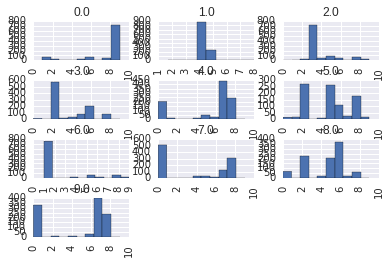

In [128]:
test_df['Cluster'].hist(by=test_df['Label'])

In [129]:
test_df.groupby(['Label','Cluster'])['Cluster'].count()

Label  Cluster
0.0    0            3
       1           63
       2           35
       3            3
       5           30
       6           75
       7            1
       8           57
       9          713
1.0    1            3
       2            6
       3            1
       4          872
       5          238
       6            3
       7            1
       8           11
2.0    0            5
       1           13
       2           23
       3          712
       4           53
       5           81
       6           52
       7            5
       8           68
       9           20
3.0    0           14
       1            6
       2          575
                 ... 
6.0    9           21
7.0    0          507
       2            1
       3            6
       4           30
       5           33
       6           18
       7          120
       8          312
       9            1
8.0    0           69
       1            6
       2          222
       3         

In [67]:
test_df['Vairance'] = pd.DataFrame(test_df.Label - test_df.Cluster)

In [130]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Label,Cluster
0,1.439396,1.533758,1.705850,2.993416,2.606283,3.178577,2.522242,2.848150,1.819115,0.940211,...,0.962655,1.472043,0.0,0.0,2.228551,0.698205,0.0,1.091734,7.0,0
1,3.876988,0.288837,1.514825,2.628214,4.046387,0.837923,2.547393,1.315813,2.081404,6.372713,...,1.920950,3.983616,0.0,0.0,1.879533,7.051126,0.0,1.306167,2.0,3
2,0.000000,0.860552,1.039834,2.888837,1.980653,1.164428,2.667731,1.959471,1.125587,0.797308,...,1.085797,1.518367,0.0,0.0,1.280862,3.333719,0.0,0.862952,1.0,4
3,4.746442,2.616378,1.453264,1.690279,7.269545,2.916892,3.879184,2.672343,2.504143,5.752549,...,2.177196,3.035470,0.0,0.0,2.508161,2.855093,0.0,2.298105,0.0,9
4,0.785093,2.686178,2.199318,1.730256,1.738629,2.907272,0.339924,0.638922,1.014574,2.956997,...,3.805755,1.695995,0.0,0.0,1.575763,1.248279,0.0,0.966686,4.0,7


In [131]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Label,Cluster
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000
mean,2.320601,2.141341,2.350264,2.568826,3.482336,2.470676,2.946397,2.105223,2.643307,3.081644,...,2.874107,2.402513,0.0,0.0,2.055657,3.396554,0.0,2.167426,4.443400,4.469900
std,1.478106,1.240657,1.315089,1.215278,2.064826,1.102161,1.091409,0.937434,1.391304,1.663919,...,1.427291,1.277320,0.0,0.0,1.027588,1.586462,0.0,1.324409,2.895865,2.887616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.245947,1.183887,1.402701,1.664216,1.881223,1.622943,2.250474,1.442623,1.540446,1.852023,...,1.893954,1.479638,0.0,0.0,1.321352,2.215043,0.0,1.181993,2.000000,2.000000
50%,2.149874,2.063359,2.144441,2.526801,3.235991,2.395341,3.002272,2.117733,2.511769,2.908856,...,2.893382,2.316023,0.0,0.0,1.961714,3.429307,0.0,1.970621,4.000000,5.000000
75%,3.205377,2.974270,3.104858,3.447505,4.850150,3.228653,3.678726,2.769303,3.653602,4.277022,...,3.848012,3.244988,0.0,0.0,2.695083,4.513322,0.0,3.044030,7.000000,7.000000
max,8.526831,7.031223,8.093109,6.250950,10.171324,6.767524,6.519832,5.283956,6.969714,8.271577,...,7.962352,7.429311,0.0,0.0,6.465517,8.619820,0.0,7.539230,9.000000,9.000000


In [132]:
test_df.groupby('Cluster').count()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Label
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143,...,1143,1143,1143,1143,1143,1143,1143,1143,1143,1143
1,879,879,879,879,879,879,879,879,879,879,...,879,879,879,879,879,879,879,879,879,879
2,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144,...,1144,1144,1144,1144,1144,1144,1144,1144,1144,1144
3,757,757,757,757,757,757,757,757,757,757,...,757,757,757,757,757,757,757,757,757,757
4,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062,...,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062
5,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,...,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036
6,887,887,887,887,887,887,887,887,887,887,...,887,887,887,887,887,887,887,887,887,887
7,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,...,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010
8,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,...,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297


In [133]:
test_df_sample=test_df[0:10000]
test_df_sample=test_df_sample[test_df_sample.Label < 3]

sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('A','B',
           data=test_df_sample, 
           fit_reg=False, 
           hue="Label",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('PC#1')
plt.ylabel('PC#2')

KeyError: "['A' 'B'] not in index"

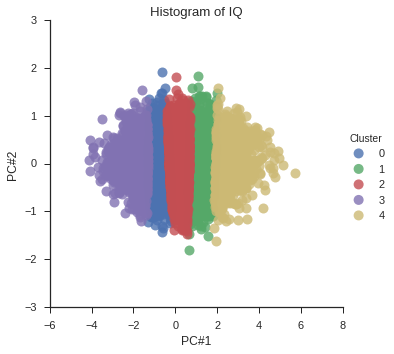

In [63]:
test_df_sample=test_df[0:10000]
test_df_sample=test_df_sample[test_df_sample.Cluster < 10]

sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")


sb.lmplot('A','B',
           data=test_df_sample, 
           fit_reg=False, 
           hue="Cluster",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Histogram of IQ')
plt.xlabel('PC#1')
plt.ylabel('PC#2')

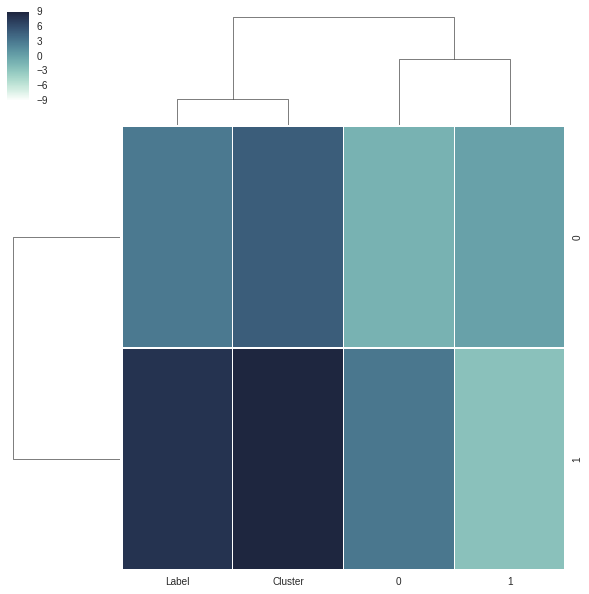

In [120]:
cmap = sb.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sb.clustermap(test_df[0:2], cmap=cmap, linewidths=.5)

In [74]:
reduced_train_data = reduced_train_data[0:501,]

In [75]:
reduced_train_data.shape

(501, 2)

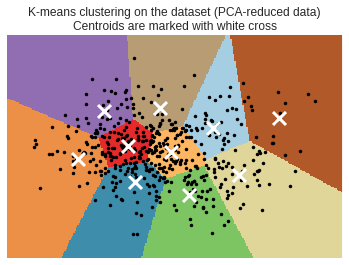

In [76]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .05    # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_train_data[:, 0].min() - 1, reduced_train_data[:, 0].max() + 1
y_min, y_max = reduced_train_data[:, 1].min() - 1, reduced_train_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_train_data[:, 0], reduced_train_data[:, 1], 'k.', markersize=7)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
raw_data['Cluster_Label'] = kmeans.labels_